In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_excel("Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [98]:
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150442 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             150441 non-null  object 
 1   item_date      150441 non-null  float64
 2   quantity tons  150442 non-null  object 
 3   customer       150441 non-null  float64
 4   country        150438 non-null  float64
 5   status         150442 non-null  object 
 6   item type      150442 non-null  object 
 7   application    150439 non-null  float64
 8   thickness      150442 non-null  float64
 9   width          150442 non-null  float64
 10  material_ref   68029 non-null   object 
 11  product_ref    150442 non-null  int64  
 12  delivery date  150441 non-null  float64
 13  selling_price  150442 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 17.2+ MB


(None,
 id                   1
 item_date            1
 quantity tons        0
 customer             1
 country              4
 status               0
 item type            0
 application          3
 thickness            0
 width                0
 material_ref     82413
 product_ref          0
 delivery date        1
 selling_price        0
 dtype: int64)

In [4]:
df['material_ref'] = df['material_ref'].apply(lambda x: None if str(x).startswith('00000') else x)

In [26]:
df=df[df.status.isin(["Won","Lost"])]

# Exploratory Data Analysis

### distribution of selling price

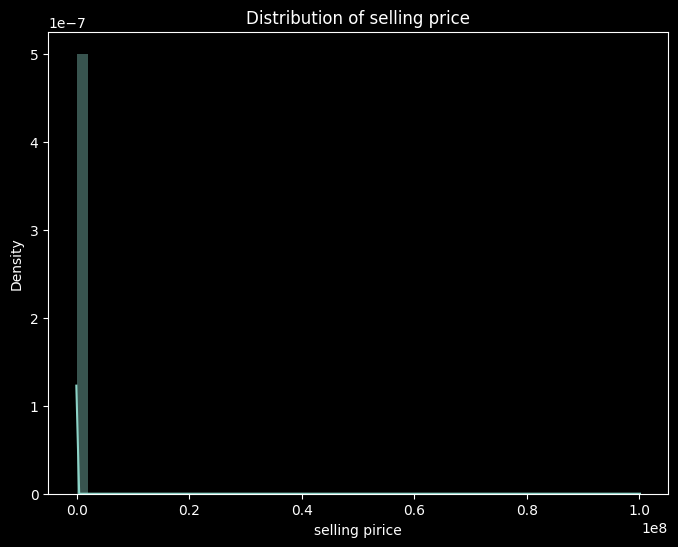

In [5]:
plt.figure(figsize=(8, 6))
sns.distplot(df["selling_price"])
plt.xlabel("selling pirice")
plt.ylabel("Density")
plt.title("Distribution of selling price")
plt.show()

In [7]:
df.selling_price.min(),df.selling_price.max()

(-1160.0, 81236.14)

In [8]:
df[df["selling_price"]<=0]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
28,BEC18863-E965-478B-9861-A49A77F26655,20210401.0,99.059199,30153510.0,30.0,Won,W,41.0,0.595,1207.0,GOO1208X595SP,611993,20210401.0,-1160.0
41,77AE96A1-0FD6-4974-934D-2FA53C502087,20210401.0,59.907355,30202938.0,25.0,Won,W,41.0,2500.000,1260.0,None,1670798778,20210401.0,0.0
44761,947C725B-85ED-4817-B4F8-27720314F9E6,20210204.0,101.397995,30198657.0,32.0,Won,W,41.0,1.250,1100.0,NaN,1721130331,20210401.0,-730.0
44810,35C64267-229F-438E-9A3B-91A6A41DACE2,20210203.0,12.225889,30157111.0,78.0,Won,W,41.0,0.750,1250.0,NaN,164141591,20210401.0,-445.0
105189,8CA4D51F-DF96-4B88-805D-3937CCFDA810,20201112.0,5.280274,30209814.0,25.0,Won,W,15.0,6.000,1250.0,NaN,1671863738,20210201.0,-336.0


we can see selling price is having negative values in 5 entries which is not possible. we consider removing those 5 entries.

In [111]:
df=df[df["selling_price"]>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150442 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             150441 non-null  object 
 1   item_date      150441 non-null  float64
 2   quantity tons  150442 non-null  object 
 3   customer       150441 non-null  float64
 4   country        150438 non-null  float64
 5   status         150442 non-null  object 
 6   item type      150442 non-null  object 
 7   application    150439 non-null  float64
 8   thickness      150442 non-null  float64
 9   width          150442 non-null  float64
 10  material_ref   68029 non-null   object 
 11  product_ref    150442 non-null  int64  
 12  delivery date  150441 non-null  float64
 13  selling_price  150442 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 17.2+ MB


In [10]:
df.selling_price.min()

0.1

In [11]:
df[df["selling_price"]<=0.5]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
45505,5FCD459B-E5CD-45C1-9F3F-729400C754E2,20210203.0,90.609126,30279672.0,28.0,Won,W,41.0,0.84,1500.0,NaN,611993,20210501.0,0.1


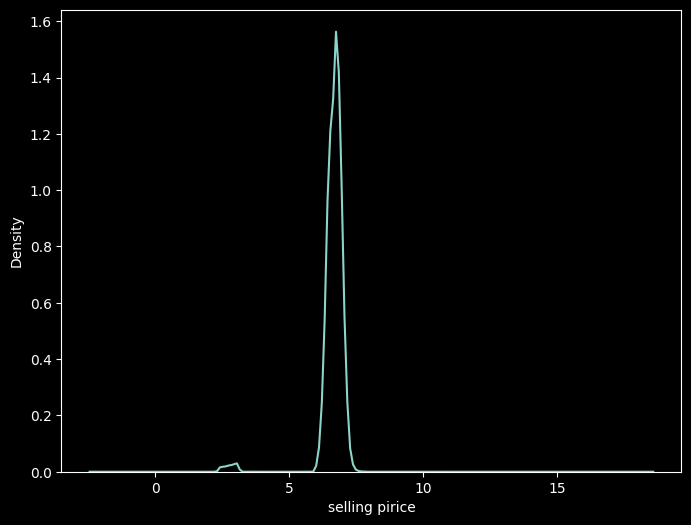

In [6]:
plt.figure(figsize=(8, 6))
sns.kdeplot(np.log(df["selling_price"]))
plt.xlabel("selling pirice")
plt.ylabel("Density")
plt.show()

we can see the selling price is not having normal distribution and it varies alot.

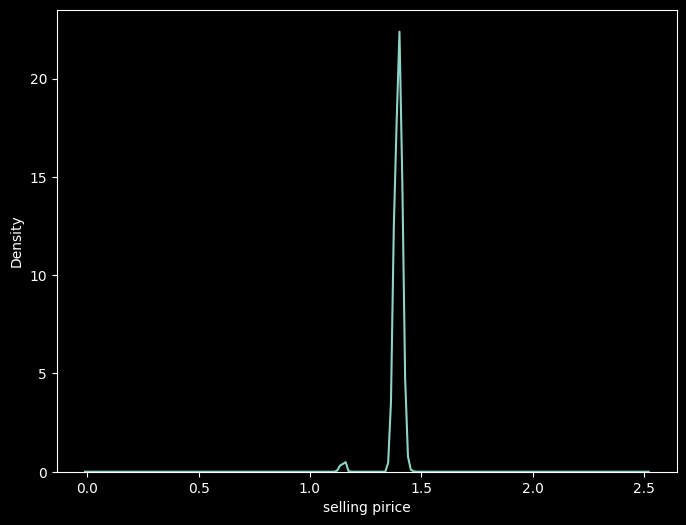

In [7]:
plt.figure(figsize=(8, 6))
sns.kdeplot(np.power(df["selling_price"],0.05))
plt.xlabel("selling pirice")
plt.ylabel("Density")
plt.show()

In [14]:
## for all the transformations it is not getting into proper distribution.we dont consider linear regression.

### Analysing target with features.

<AxesSubplot:xlabel='item type'>

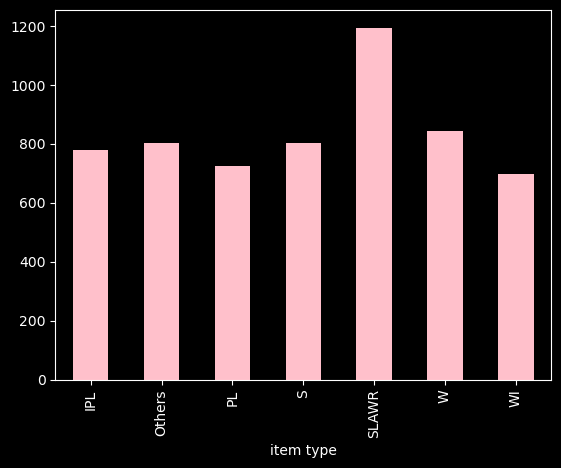

In [10]:
df.groupby("item type")["selling_price"].mean().plot(kind="bar",color="Pink")

item type of SLAWR is having high selling price.

<AxesSubplot:xlabel='status'>

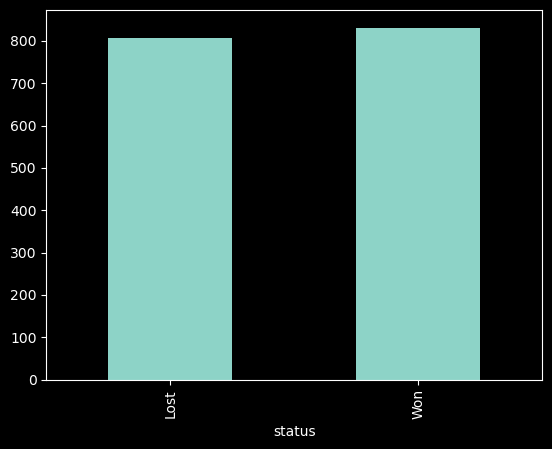

In [11]:
df.groupby("status")["selling_price"].mean().plot(kind="bar")

seling price is almost same for both the status

<AxesSubplot:xlabel='material_ref'>

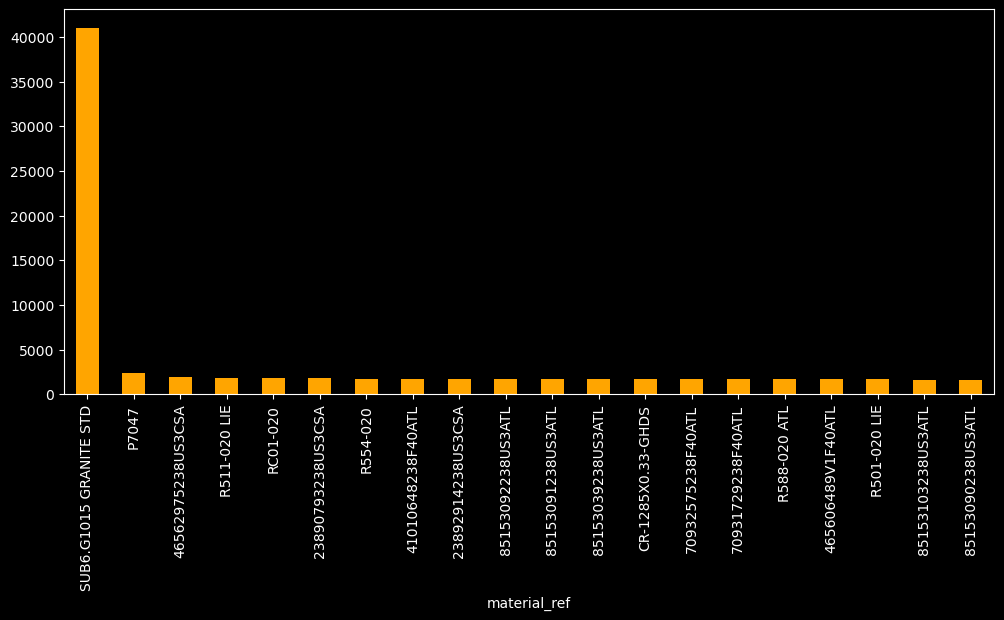

In [12]:
df.groupby("material_ref")["selling_price"].mean().nlargest(20).plot(kind="bar",figsize=(12,5),color="Orange")

granite material is having very high selling price.All other materials are almost having same selling prices.

In [88]:
df[df["material_ref"]=="SUB6.G1015 GRANITE STD"]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
66721,A3189556-989B-4D0A-944D-E1C0CD254155,20210111.0,46.229594,30229766.0,84.0,Won,W,41.0,0.5,1250.0,SUB6.G1015 GRANITE STD,611993,20201001.0,831.18
123570,589B096F-C9AA-4F93-AE7B-C661C85FD31D,20201014.0,1.792484,30229766.0,84.0,Won,W,41.0,0.5,1250.0,SUB6.G1015 GRANITE STD,611993,20201001.0,81236.14


only two item is of granite material and both are given to the same customer at different times. we can observe
that
* the item date and delivery date are wrong.delivery was in 2020 but order was in 2021.
* when the quantity increases selling price decreases.but it seems unreliable because 1 ton is 81k but when buying 46 ton it is showing 831 rupees.

<AxesSubplot:xlabel='product_ref'>

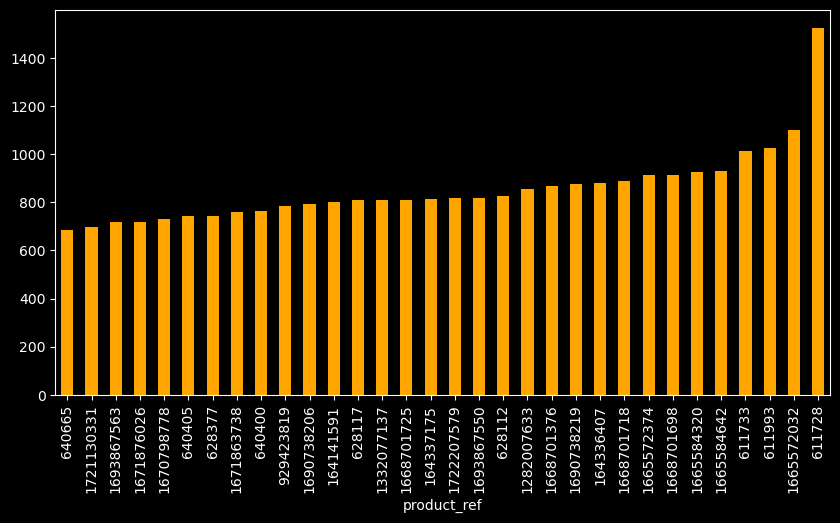

In [13]:
df.groupby("product_ref")["selling_price"].mean().sort_values().plot(kind="bar",color="Orange",figsize=(10,5))

* product ref 611728 is having high selling price.
* But according with material_ref product_ref 611993 should have been the highest.but it came at 3rd place.
* Let us analyse more.

In [82]:
df_p=df[df["product_ref"]==611728]

In [83]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 9224 to 175594
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             84 non-null     object 
 1   item_date      84 non-null     float64
 2   quantity tons  84 non-null     object 
 3   customer       84 non-null     float64
 4   country        84 non-null     float64
 5   status         84 non-null     object 
 6   item type      84 non-null     object 
 7   application    84 non-null     float64
 8   thickness      84 non-null     float64
 9   width          84 non-null     float64
 10  material_ref   35 non-null     object 
 11  product_ref    84 non-null     int64  
 12  delivery date  84 non-null     float64
 13  selling_price  84 non-null     float64
dtypes: float64(8), int64(1), object(5)
memory usage: 9.8+ KB


In [96]:
df[(df["product_ref"]==611728 )& (df["material_ref"].notnull())]## to get the corresponding material

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
32469,4B75CCB5-6A4D-4F43-8B84-D9D6C819107B,20210224.0,1.291283,30230059.0,26.0,Won,W,42.0,0.63,188.0,0016368_UP BLACK_DOWN WHITE,611728,20210701.0,1591.0
32485,43872BF1-2405-44B6-845C-112B064B9CA5,20210224.0,10.312185,30275723.0,26.0,Won,W,42.0,0.40,129.5,B0016338,611728,20210701.0,1529.0
32489,A7DF8128-E792-4FF6-A55F-7E5E119D1937,20210224.0,3.693474,30275723.0,26.0,Won,W,42.0,0.40,105.0,B0016295,611728,20210701.0,1560.0
32493,04FD0BE4-C4F6-486C-A5F2-55A9467D3043,20210224.0,10.46619,30275723.0,26.0,Won,W,42.0,0.40,125.0,B0016296,611728,20210701.0,1569.0
32505,2AB6C626-CDD0-4281-8B74-093FD839FD81,20210224.0,9.374997,30275723.0,26.0,Won,W,42.0,0.50,84.0,B0016292,611728,20210701.0,1495.0
32509,F9EBB35B-9BCE-44A4-8D4C-E18351290C27,20210224.0,23.485467,30275723.0,26.0,Won,W,42.0,0.50,89.7,B0016361,611728,20210701.0,1491.0
32513,8AD460D5-1522-48AA-8A4C-F903663638F3,20210224.0,2.503391,30275723.0,26.0,Won,W,42.0,0.50,101.5,B0016289,611728,20210701.0,1497.0
32525,B2BB0D9B-1467-48A3-9801-9C6B127D3E81,20210224.0,10.42,30275723.0,26.0,Won,W,42.0,0.50,131.5,B0016290,611728,20210701.0,1493.0
32533,2E89797D-4F35-492B-B1AA-615E701F75BD,20210224.0,4.487711,30275723.0,26.0,Won,W,42.0,0.50,235.0,B0016231,611728,20210701.0,1538.0
32541,B2980147-5F0B-48E8-A7BF-E18354E6B326,20210224.0,10.824299,30275723.0,26.0,Won,W,42.0,0.63,100.5,B0016355,611728,20210701.0,1466.0


* we can see one material is from IKEA.

In [97]:
df_p.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
9224,0D5D99E0-1A6F-4FDA-9F0F-F63782E50648,20210319.0,31.840819,30275723.0,26.0,Won,W,42.0,0.63,188.0,None,611728,20210701.0,1440.0
9290,B00A51AF-8A15-45A2-AAF0-5421493483CB,20210319.0,210.41082,30210549.0,25.0,Won,W,41.0,0.41,452.5,None,611728,20210701.0,1383.0
9294,6C0E1235-FFD8-4298-A311-0FE746B95292,20210319.0,163.776766,30210549.0,25.0,Won,W,41.0,0.41,452.5,None,611728,20210701.0,1394.0
15017,69D89A61-4904-4CDC-8CF0-2C7571899AAB,20210315.0,22.871685,30147848.0,84.0,Won,S,42.0,0.19,29.0,None,611728,20210401.0,1966.0
32469,4B75CCB5-6A4D-4F43-8B84-D9D6C819107B,20210224.0,1.291283,30230059.0,26.0,Won,W,42.0,0.63,188.0,0016368_UP BLACK_DOWN WHITE,611728,20210701.0,1591.0


* now we can understand since material_ref is having lots of null values it gave us wrong results while plotting.Indeed product_ref 611728 is having high selling price.

<AxesSubplot:xlabel='quantity tons'>

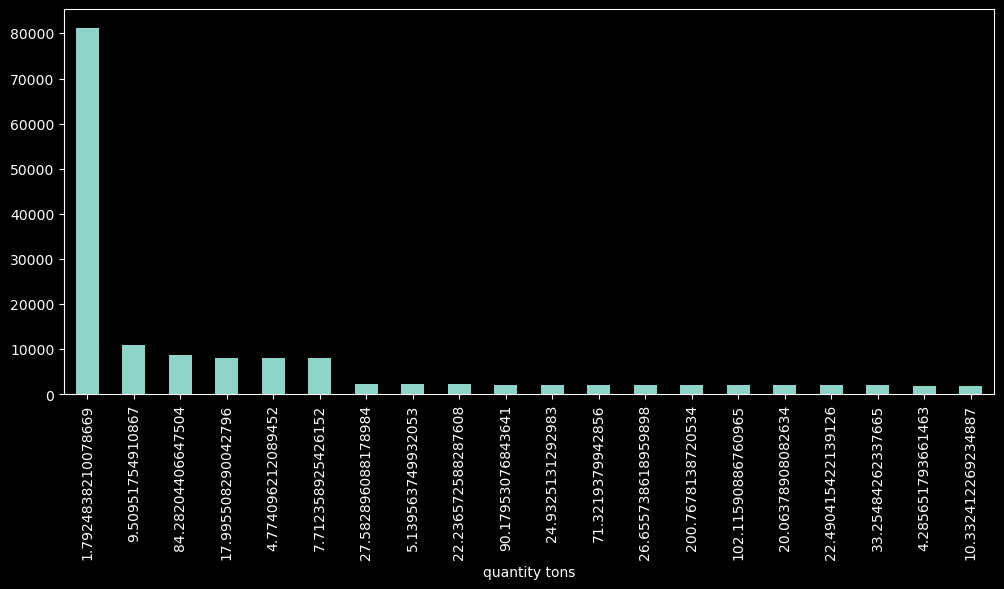

In [14]:
df.groupby("quantity tons")["selling_price"].mean().nlargest(20).plot(kind="bar",figsize=(12,5))

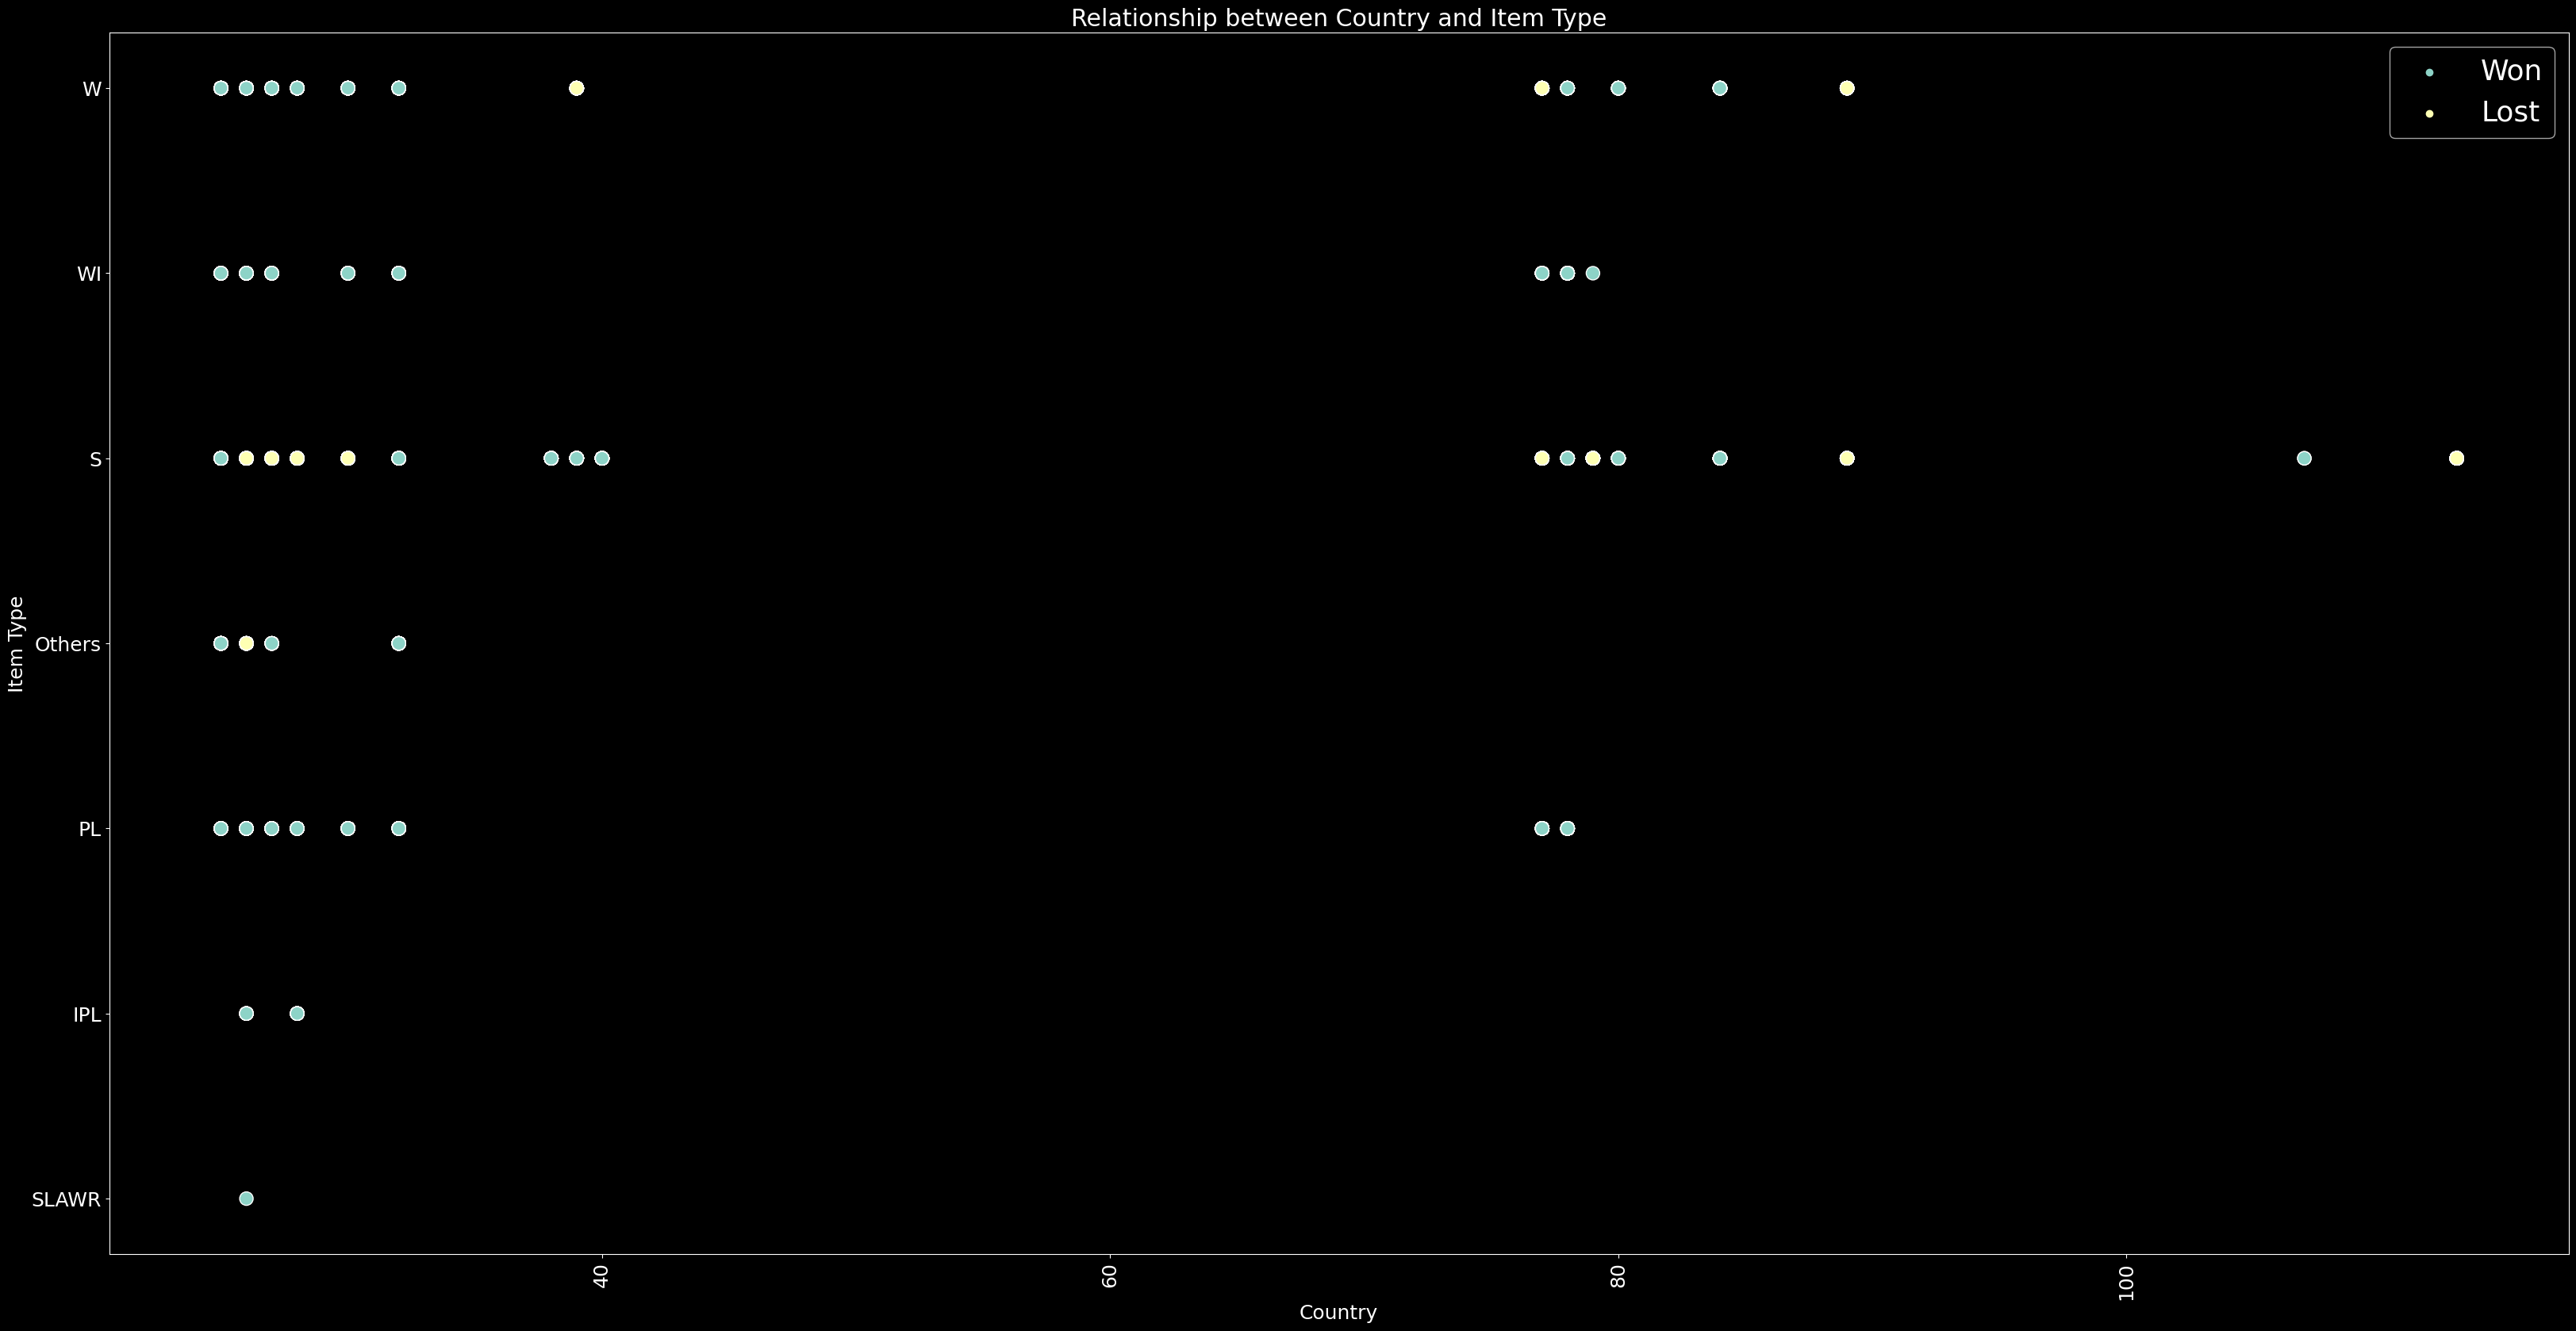

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set larger figure size
plt.figure(figsize=(40, 20))

# Set larger font size for labels
plt.rcParams.update({'font.size': 18})

# Create the scatterplot
sns.scatterplot(y="item type", x="country", hue="status", data=df, color="brown", s=150)  # Adjust s parameter for dot size

plt.xlabel("Country")
plt.ylabel("Item Type")
plt.title("Relationship between Country and Item Type")
plt.xticks(rotation=90)

# Set larger legend font size
plt.legend(fontsize='x-large')

# Show the plot
plt.show()


In [29]:
DF=df[df["item type"]=="PL"]

In [31]:
DF.status.value_counts()

Won     4980
Lost      52
Name: status, dtype: int64

<Axes: xlabel='customer'>

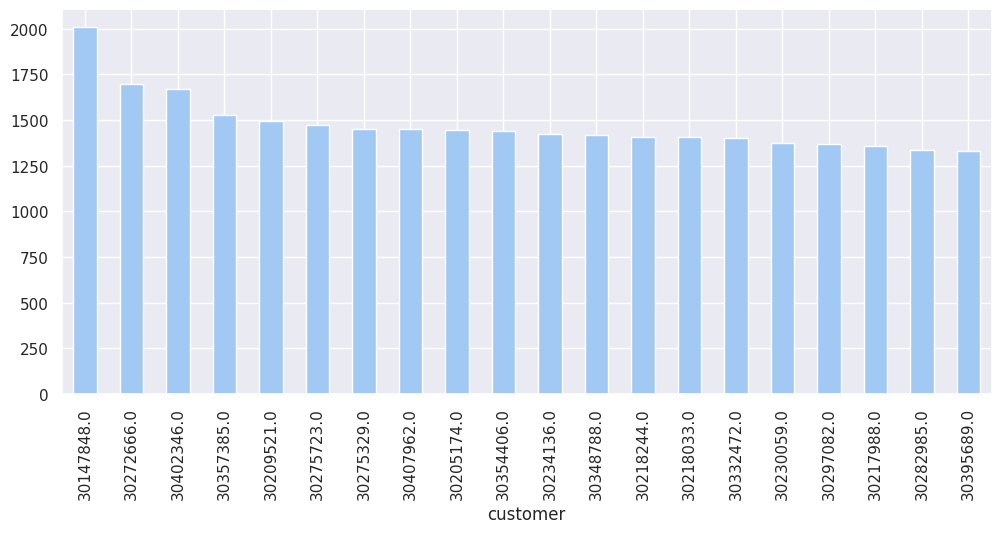

In [68]:
df.groupby("customer")["selling_price"].mean().nlargest(20).plot(kind="bar",figsize=(12,5))

<Axes: xlabel='customer'>

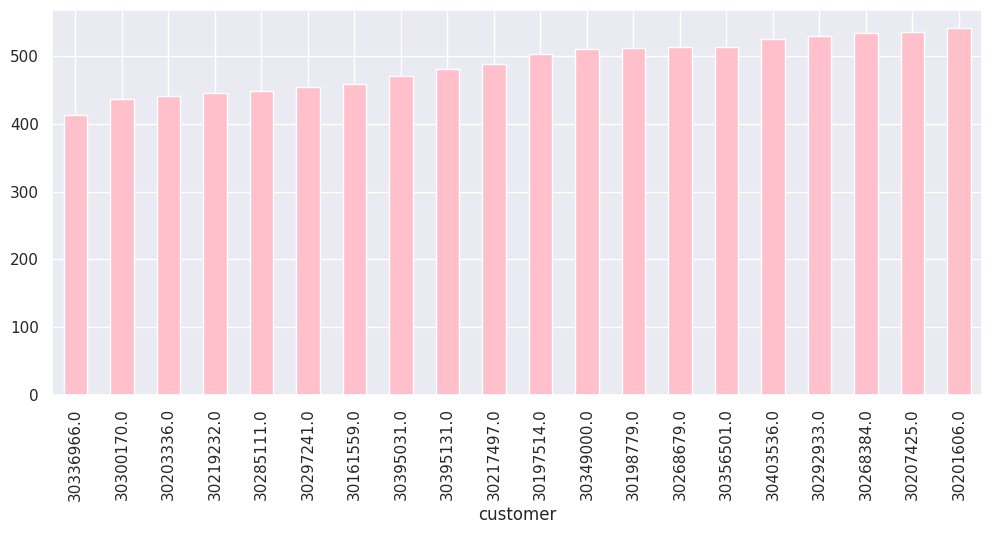

In [72]:
df.groupby("customer")["selling_price"].mean().nsmallest(20).plot(kind="bar",figsize=(12,5),color="Pink")

<Axes: xlabel='country'>

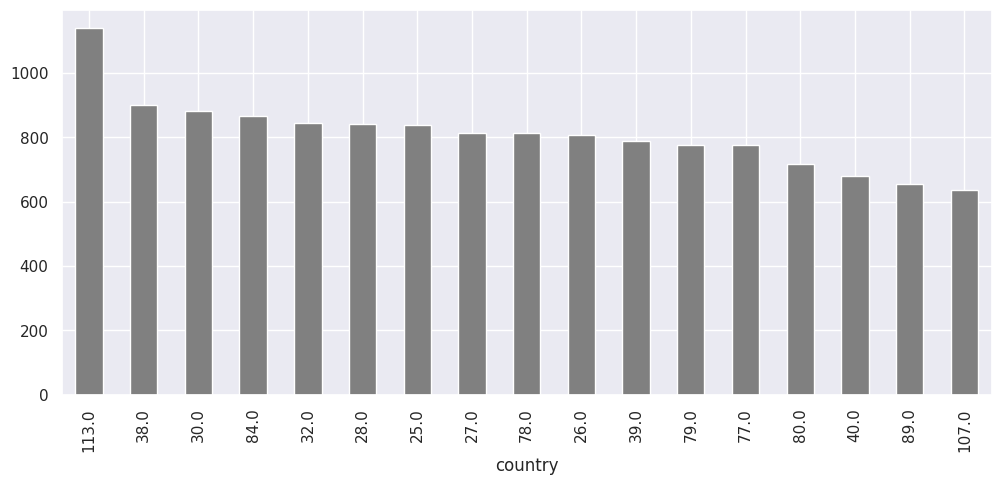

In [76]:
df.groupby("country")["selling_price"].mean().nlargest(20).plot(kind="bar",figsize=(12,5),color="Grey")

country 118 is having high sales and  107 having low selling price.all other countries are almost having same amount of sales.

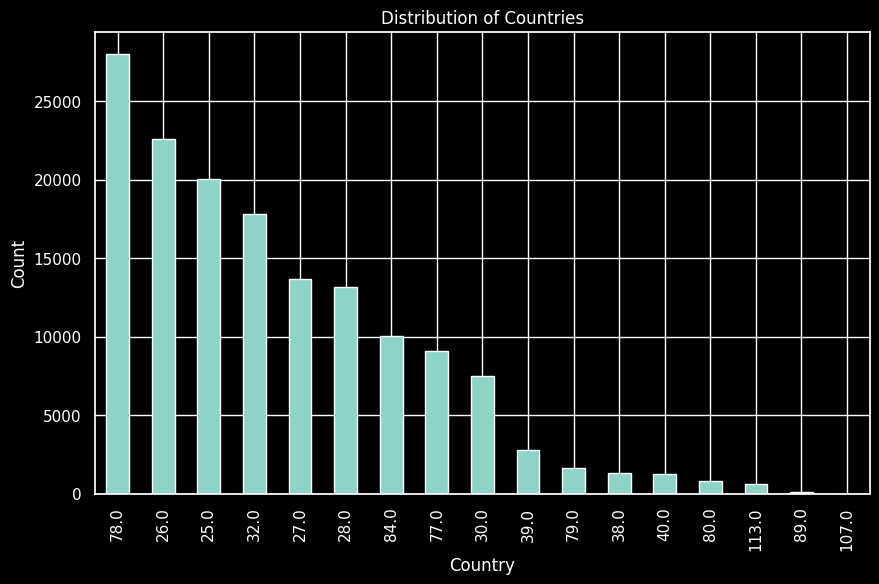

In [106]:
country_counts = df['country'].value_counts()

# Create a bar plot of the country counts
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries')
plt.show()


In [18]:
### They have high orders in country 78 and very low orders in country 107.

<Axes: >

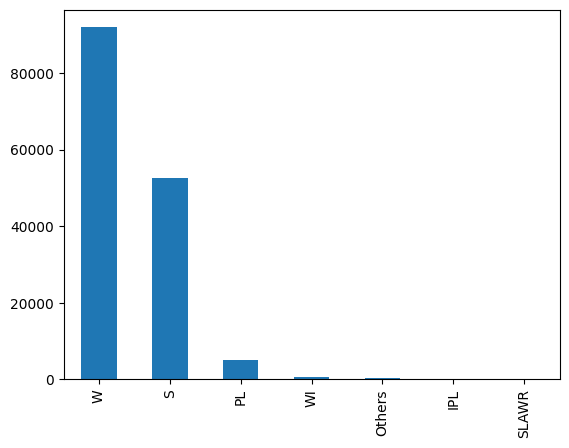

In [19]:
df["item type"].value_counts().plot(kind="bar")

<Axes: >

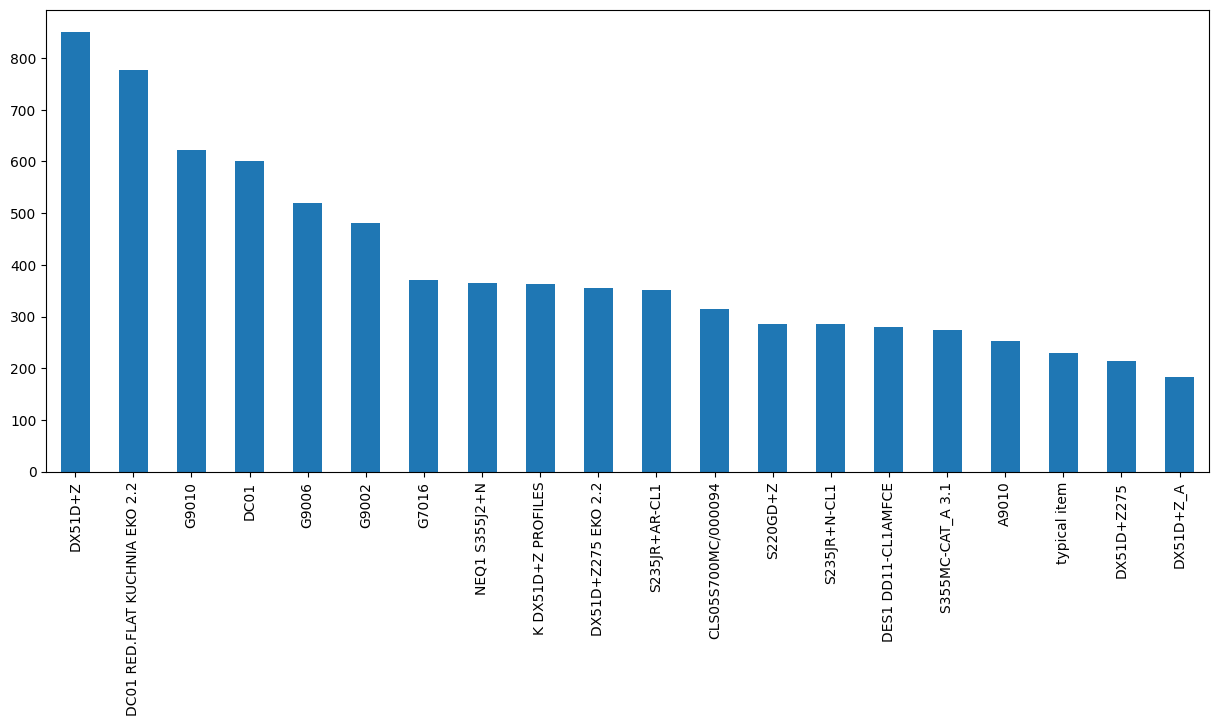

In [20]:
df["material_ref"].value_counts().nlargest(20).plot(kind="bar",figsize=(15,6))


In [25]:
df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

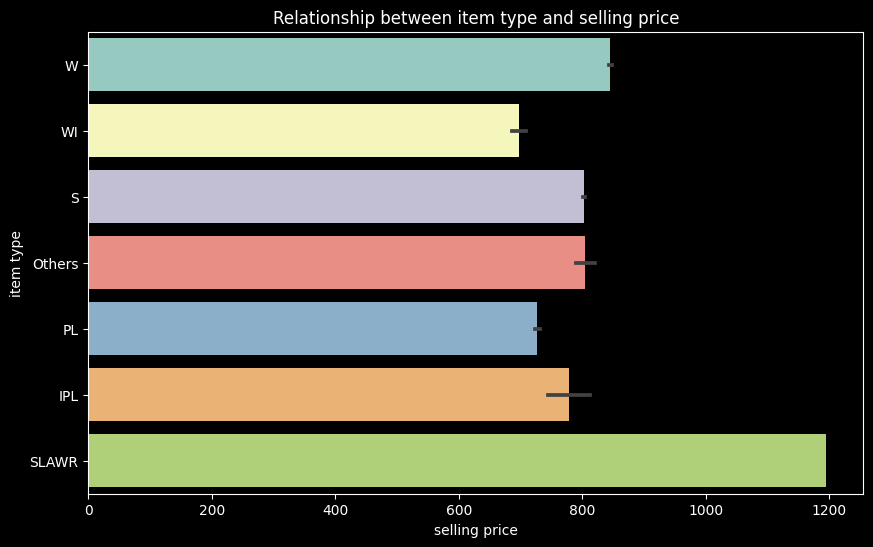

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(y="item type", x="selling_price", data=df)
plt.ylabel("item type")
plt.xlabel("selling price")
plt.title("Relationship between item type and selling price")
plt.show()

## handling skewness

In [11]:
numeric_columns = df.select_dtypes(include=['number'])

# Check if any numeric columns have negative values
negative_columns = (numeric_columns <= 0).any()

# Print the numeric columns with negative values
print("Numeric columns with negative values:")
print(negative_columns[negative_columns].index.tolist())

Numeric columns with negative values:
['selling_price']


we can see only target column is having negative values. we can apply log transform or box-cox for other columns.

In [12]:
skewness = df.select_dtypes(include=[np.number]).apply(lambda x: x.skew())


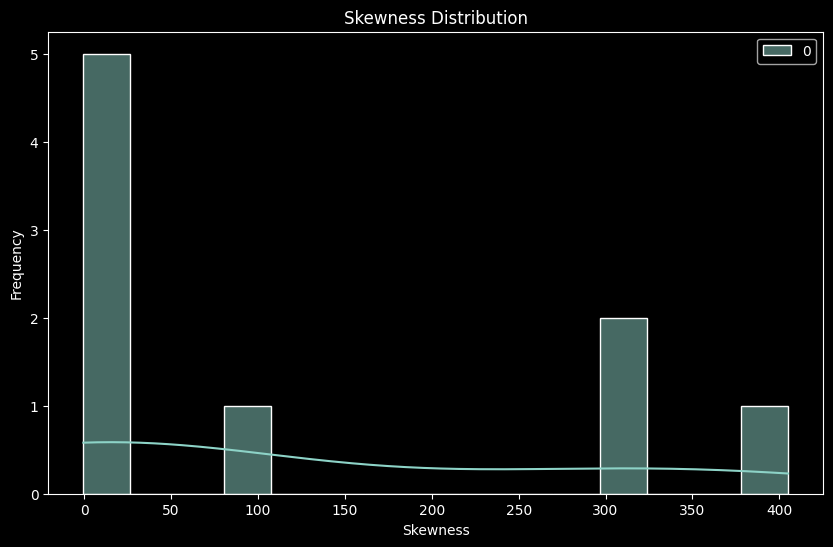

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(skewness, bins=15, kde=True)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Skewness Distribution')
plt.show()

In [13]:
skewness=pd.DataFrame(skewness)

In [29]:
skewness

,0
item_date,-0.717295
customer,223.888671
country,0.708334
application,0.751049
thickness,17.118569
width,0.352714
product_ref,1.013511
delivery date,-0.727867
selling_price,141.496573


<function matplotlib.pyplot.show(close=None, block=None)>

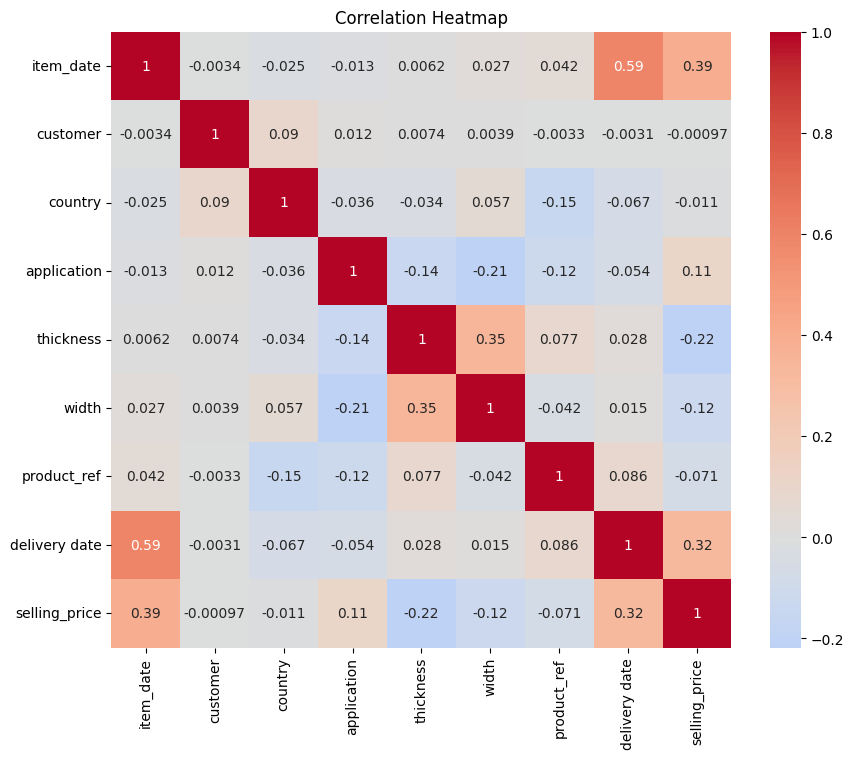

In [30]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show

#### handling skewness of thickness column

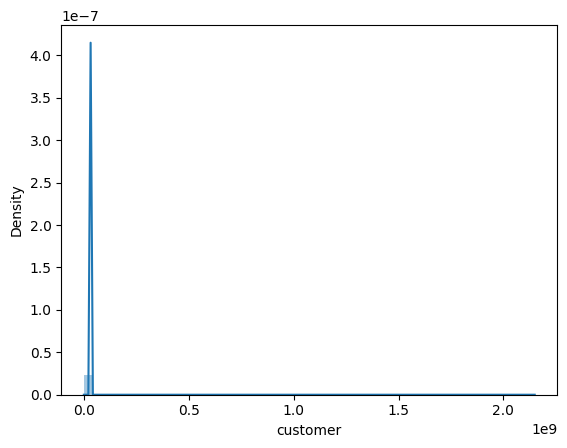

In [31]:
plt.figure()
sns.distplot(df["customer"])
plt.show()

<Axes: xlabel='customer', ylabel='Density'>

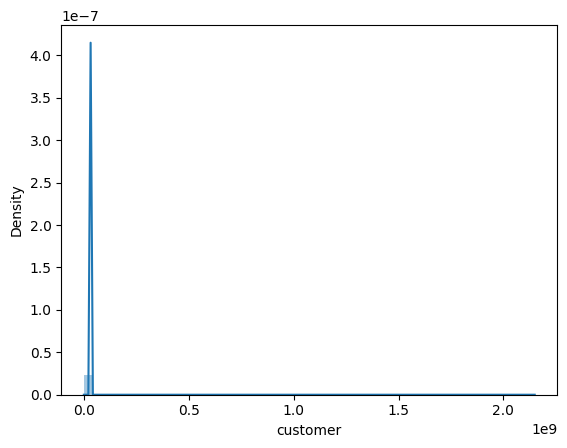

In [32]:
sns.distplot(df.customer)

In [33]:
df.customer.unique()

array([30156308., 30202938., 30153963., ..., 30403536., 30284694.,
       30161559.])

<Axes: xlabel='thickness', ylabel='Density'>

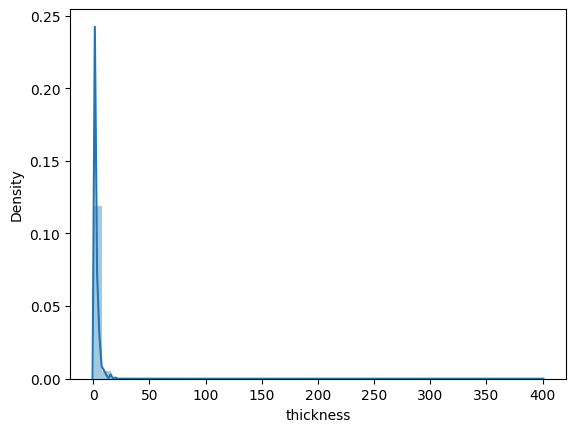

In [34]:
#df.thickness.plot(kind="line")
sns.distplot(df["thickness"])

In [35]:
df.thickness_log=np.log(df.thickness)

In [36]:
df.thickness.max()

400.0

In [37]:
df.thickness.min()

0.18

In [38]:
from scipy.stats import skew
(df.thickness_log).skew()

0.3266235205235512

<Axes: xlabel='thickness', ylabel='Density'>

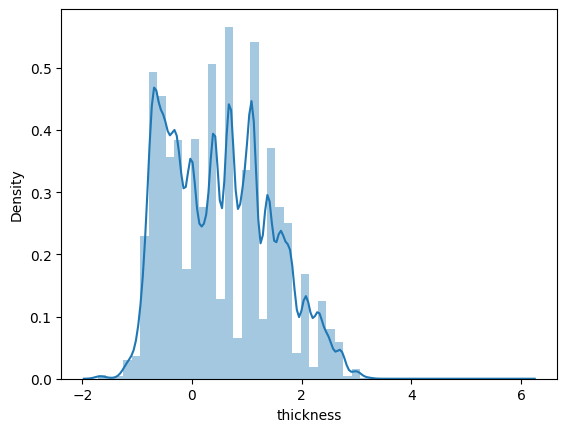

In [40]:
#df.thickness_log.plot(kind="line")
sns.distplot(df.thickness_log)